In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams ["figure.figsize"] = (16,8)

In [2]:
df=pd.read_csv('House_data.csv.xls')

In [3]:
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df2=df.drop(['area_type','availability','society','balcony'],axis=1)

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
#create a new column with the int values that are equal to the integer before the space in the column size
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

/var/folders/lb/j81n4r5516l0zy01s9b7gllh0000gn/T/ipykernel_10836/1447228099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3[df3['bhk']>=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [17]:
df3[~(df3['total_sqft'].apply(isfloat))]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def conv_to_int(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return((float(tokens[0])+float(tokens[1]))/2)
    try:
        float(x)
        return float(x)
    except:
        return None
        

In [19]:
df4=df3.copy()

In [20]:
df4['total_sqft']=df4['total_sqft'].apply(conv_to_int)

In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(10)

location
Whitefield               534
Sarjapur  Road           392
Electronic City          302
Kanakpura Road           266
Thanisandra              233
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [23]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [24]:
len(location_stats)

1304

In [25]:
df4.head(50)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3
4,Kothanur,2 BHK,1200.00,2.0,51.00,2
5,Whitefield,2 BHK,1170.00,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.00,6.0,370.00,6


### Feature Enginnering : adding some new features to make the analysis more easier . 

In [26]:
df5 = df4. copy ()
df5.head ()
df5 ['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [27]:
len(location_stats[location_stats<=10])


1063

In [28]:
location_stats_lessthan10=location_stats[location_stats<=10]

In [29]:
df5['location']=df4['location'].apply(lambda x:'other' if x in location_stats_lessthan10 else x)

In [30]:
df5['location'].value_counts()

location
other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [31]:
df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

location
other                        2896
Whitefield                    534
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                266
                             ... 
HAL 2nd Stage                  11
Nehru Nagar                    11
Kodigehalli                    11
2nd Phase Judicial Layout      11
Pattandur Agrahara             11
Name: location, Length: 242, dtype: int64

In [32]:
df5.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [33]:
df5[df5['location']=='Whitefield']

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4,10592.459605
27,Whitefield,3 BHK,1610.0,3.0,81.00,3,5031.055901
47,Whitefield,2 BHK,1459.0,2.0,94.82,2,6498.971899
...,...,...,...,...,...,...,...
13235,Whitefield,3 BHK,1730.0,3.0,125.00,3,7225.433526
13257,Whitefield,3 BHK,1453.0,2.0,58.00,3,3991.741225
13258,Whitefield,1 BHK,877.0,1.0,59.00,1,6727.480046
13299,Whitefield,4 BHK,2856.0,5.0,154.50,4,5409.663866


In [34]:

df5[df5['total_sqft']/df5['bhk']<300].shape

(744, 7)

In [35]:
# remove the data abnormal stats
df6=df5[~(df5['total_sqft']/df5['bhk']<300)]

In [36]:
df6.shape

(12502, 7)

In [37]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        s=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>(m-s)) & (subdf['price_per_sqft']<=(m+s))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [38]:
df7=remove_outliers(df6)

In [39]:
df7.shape

(10244, 7)

In [40]:
def plotscatter(df,location):
    bhk2=df[(df['location']==location)& (df.bhk==2)]
    bhk3=df[(df['location']==location)& (df.bhk==3)]
   
    matplotlib.rcParams ["figure.figsize"] = (14,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='o',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()
    
    

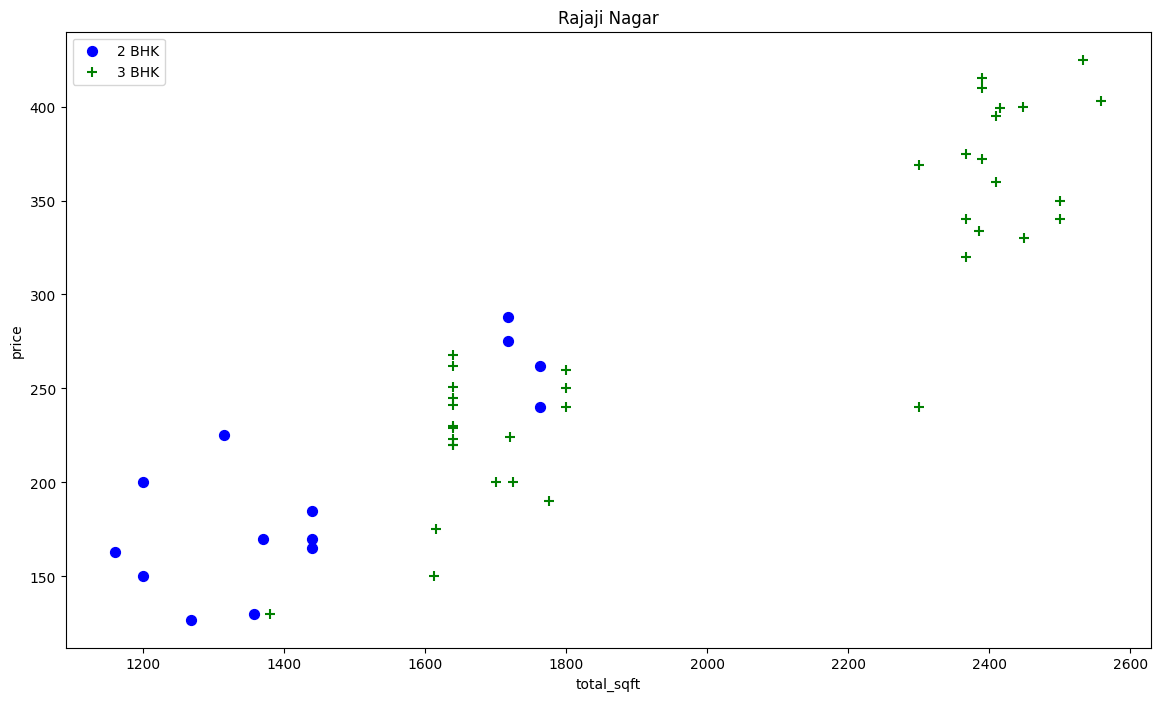

In [41]:
plotscatter(df7 ,'Rajaji Nagar')

In [42]:
def remove_outliers2(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [43]:
df8=remove_outliers2(df7)

In [44]:
df8.shape

(7342, 7)

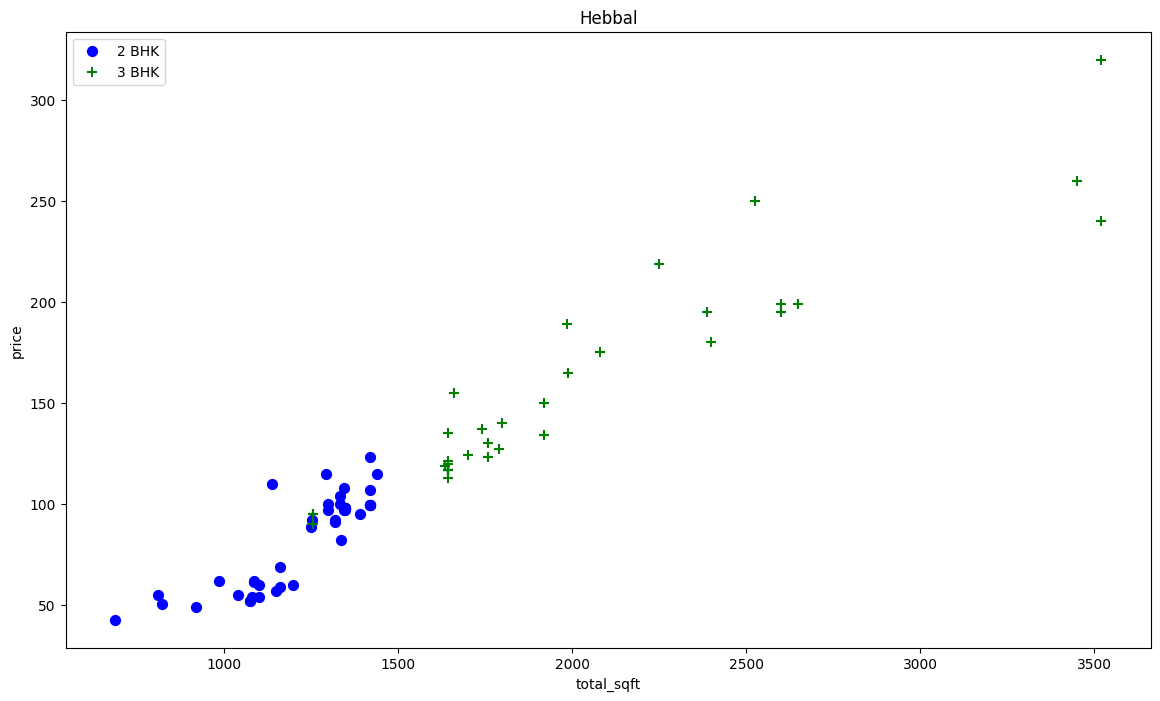

In [45]:
plotscatter(df8 ,'Hebbal')


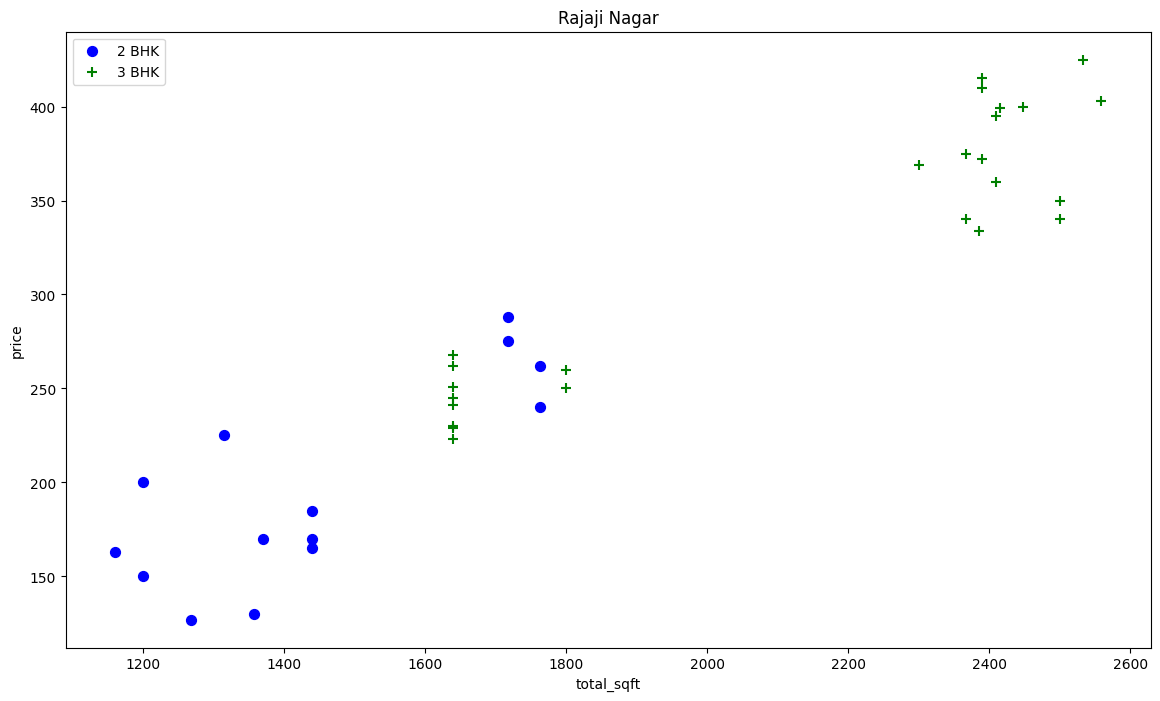

In [46]:
plotscatter(df8 ,'Rajaji Nagar')

Text(0, 0.5, 'count')

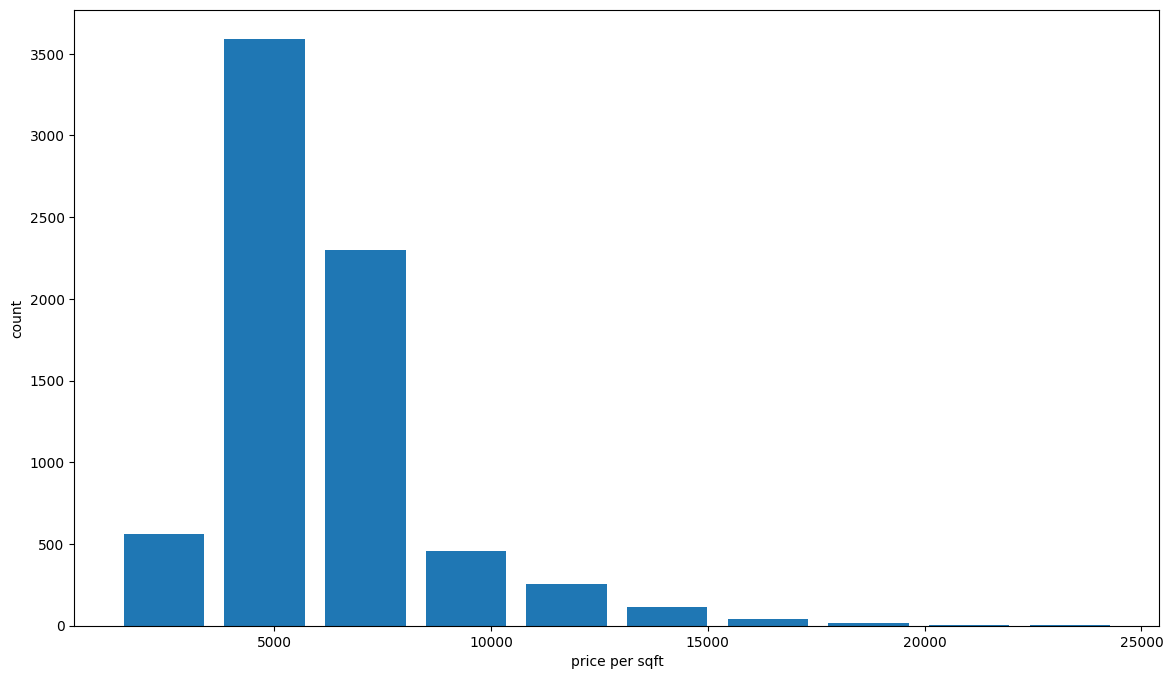

In [47]:
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('price per sqft')
plt.ylabel('count')

In [48]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [50]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df9=df8[df8.bath<df8.bhk+2]

In [52]:
df9.shape

(7264, 7)

In [53]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [54]:
pd.get_dummies(df10.location)
dummies=pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [56]:
df11.shape

(7264, 246)

In [57]:
df12=df11.drop('location',axis='columns')

In [58]:
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

In [71]:
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
clf_log=LinearRegression()
X=df12.drop('price',axis=1)
y=df12.price

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)

In [62]:
clf_log.fit(X_train,y_train)


LinearRegression()

In [63]:
clf_log.score(X_test,y_test)

0.8930637191424805

In [64]:
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=4)
cvs=cross_val_score(LinearRegression(),X,y,cv=cv)
cvs.mean()

0.863176410078705

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [66]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
dt.score(X_test,y_test)

0.8629122337100733

In [68]:
model={
    'DTR':{
       'model':DecisionTreeRegressor(),
       'params':{ 'splitter':['best','random'],
           'criterion':['mse','friedman_mse']
           
        
     }
     
    },
    'LinearRegression':{
        'model':LinearRegression(),
        'params':{'fit_intercept':[True,False]
            
        }
    },
    
    'Lasso':{
        'model':Lasso(),
        'params':{
            'max_iter':[1000,1200,1400],
            'alpha':[1,2],
            'selection':['random','cyclic']
            
        }
    }
    
}

In [69]:
scores=[]
cv=ShuffleSplit(n_splits=5,random_state=4,test_size=0.2)
for model_name,params in model.items():
    clf_cv=GridSearchCV(params['model'],params['params'],cv=cv,return_train_score=False)
    clf_cv.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':clf_cv.best_score_ ,
        "best_params":clf_cv.best_params_})
        

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-package

In [70]:
pd.DataFrame(scores)

,model,best_score,best_params
0,DTR,0.746793,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
1,LinearRegression,0.863502,{'fit_intercept': False}
2,Lasso,0.726382,"{'alpha': 1, 'max_iter': 1400, 'selection': 'r..."


In [91]:
np.where(X.columns=='Hebbal')[0][0]

99

In [109]:
def predict_price (sqft,bath,bhk,location):
    loc_index=np.where(X.columns==location)[0][0] #returns a tuple so index[0] is used
    x=np.zeros(len(X.columns)) # create an array filled with zeros of length equals to the no of columns in x
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return clf_log.predict([x])[0]
    

In [110]:
predict_price(1425,2,3,' Devarachikkanahalli')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


67.24439850864262

In [98]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [111]:
predict_price( 1000,2,2,'Indira Nagar')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.08124276496403

In [114]:
import pickle
with open ('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(clf_log, f)

In [117]:
import json
columns = {
'data_columns' : [col. lower() for col in X. columns]}
with open("columns.json", "w") as f:
      f.write(json.dumps(columns) )
              
              
